In [1]:
import time
from tensordict import TensorDict
from torchrl.envs.libs.dm_control import DMControlEnv
from torchrl.envs.transforms import ToTensorImage, TransformedEnv
from matplotlib import pyplot as plt
from pathlib import Path
from tqdm import tqdm
from imageio.v3 import imread
from imageio import get_writer
import gymnasium as gym
from torchrl.envs.libs.gym import GymWrapper

/home/user/micromamba/envs/proto/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/user/micromamba/envs/proto/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
def render_env(env_info: TensorDict, show_fig: bool = True, save_fig: bool = False, save_dir: Path = Path("outputs")):
    env_pixels = env_info.get("pixels").permute(1,2,0).numpy()
    reward = env_info.get('reward').item()
    
    fig, ax = plt.subplots()
    
    ax.set_title(f"Reward: {reward:.2f}")
    ax.axis('off')
    ax.imshow(env_pixels)
    
    if save_fig:
        save_dir.mkdir(parents=True, exist_ok=True)
        
        fig.set_size_inches(env_pixels.shape[1] / 100.0, env_pixels.shape[0] / 100.0)
        
        fig.savefig(save_dir / f"{time.time()}.png", bbox_inches='tight', pad_inches=0)
    
    if show_fig:
        plt.show()
    
    plt.close(fig)

In [3]:
def create_mp4(save_dir: Path = Path("outputs"), output_path: Path = Path("outputs"), fps=2):
    image_paths = save_dir.glob("*.png")
    images = [imread(str(path)) for path in image_paths]
    
    if len(images) == 0:
        print(f"No images found in {save_dir}, skipping mp4 creation!")
        return
    
    output_path = output_path / f"{time.time()}.mp4"

    writer = get_writer(output_path, fps=fps)

    for img in images:
        writer.append_data(img)

    writer.close()

/home/user/micromamba/envs/proto/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_envs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.num_envs` for environment variables or `env.get_wrapper_attr('num_envs')` that will search the reminding wrappers.
  logger.warn(
/home/user/micromamba/envs/proto/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.reward_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.reward_space` for environment variables or `env.get_wrapper_attr('reward_space')` that will search the reminding wrappers.
  logger.warn(
  0%|          | 0/2 [00:00<?, ?it/s]

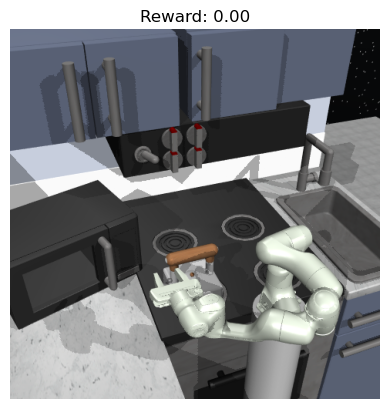

 50%|█████     | 1/2 [00:00<00:00,  5.31it/s]

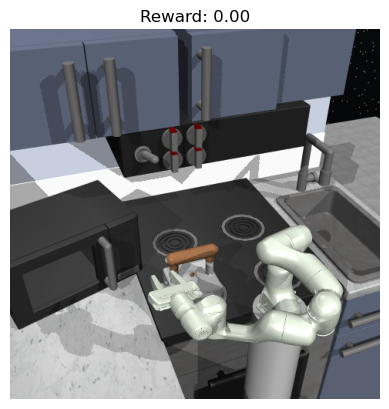

100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


In [4]:
env = gym.make('FrankaKitchen-v1', tasks_to_complete=['microwave'], render_mode='rgb_array')
env = GymWrapper(env, from_pixels=True,pixels_only=True)
env = TransformedEnv(env)
env.append_transform(ToTensorImage())

env_info = env.reset()

for i in tqdm(range(2)):
    env_info = env.rand_step()
    render_env(env_info['next'], show_fig=True, save_fig=False)

#create_mp4()